In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from utils.ar_vol import ArVol
from utils.rough_vol import RoughVol
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('oxfordmanrealizedvolatilityindices.csv')

In [4]:
data.head(10)

,Unnamed: 0,Symbol,open_price,rk_twoscale,close_price,open_to_close,rv10_ss,rk_parzen,medrv,open_time,rv5,nobs,rv5_ss,rsv,rv10,bv,rk_th2,close_time,bv_ss,rsv_ss
0,2000-01-03 00:00:00+00:00,.AEX,675.67,0.000103,675.44,-0.000340,0.000178,0.000179,0.000050,90101.0,0.000130,1795.0,0.000130,0.000046,0.000178,0.000100,0.000102,163015.0,0.000100,0.000046
1,2000-01-04 00:00:00+00:00,.AEX,664.20,0.000199,642.25,-0.033606,0.000261,0.000423,0.000075,90416.0,0.000201,1785.0,0.000201,0.000147,0.000261,0.000207,0.000201,163016.0,0.000207,0.000147
2,2000-01-05 00:00:00+00:00,.AEX,633.37,0.000325,632.31,-0.001675,0.000714,0.000324,0.000166,90016.0,0.000491,1801.0,0.000491,0.000328,0.000714,0.000361,0.000345,163016.0,0.000361,0.000328
3,2000-01-06 00:00:00+00:00,.AEX,632.46,0.000218,624.21,-0.013130,0.000182,0.000219,0.000152,90016.0,0.000225,1799.0,0.000225,0.000116,0.000182,0.000258,0.000221,163002.0,0.000258,0.000116
4,2000-01-07 00:00:00+00:00,.AEX,628.93,0.000126,644.86,0.025013,0.000157,0.000155,0.000039,90046.0,0.000138,1798.0,0.000138,0.000048,0.000157,0.000130,0.000123,163016.0,0.000130,0.000048
5,2000-01-10 00:00:00+00:00,.AEX,651.82,0.000074,655.14,0.005081,0.000126,0.000086,0.000032,90146.0,0.000109,1794.0,0.000109,0.000062,0.000126,0.000089,0.000073,163017.0,0.000089,0.000062
6,2000-01-11 00:00:00+00:00,.AEX,657.11,0.000100,648.94,-0.012511,0.000130,0.000118,0.000068,90033.0,0.000127,1795.0,0.000127,0.000079,0.000130,0.000124,0.000103,170656.0,0.000124,0.000079
7,2000-01-12 00:00:00+00:00,.AEX,643.12,0.000148,638.40,-0.007366,0.000150,0.000079,0.000085,90101.0,0.000166,1797.0,0.000166,0.000092,0.000150,0.000154,0.000150,163015.0,0.000154,0.000092
8,2000-01-13 00:00:00+00:00,.AEX,639.78,0.000138,642.21,0.003791,0.000104,0.000127,0.000033,90016.0,0.000154,1801.0,0.000154,0.000051,0.000104,0.000129,0.000138,163017.0,0.000129,0.000051
9,2000-01-14 00:00:00+00:00,.AEX,647.74,0.000104,655.60,0.012061,0.000071,0.000103,0.000050,90045.0,0.000097,1799.0,0.000097,0.000032,0.000071,0.000104,0.000104,163016.0,0.000104,0.000032


In [5]:
spx_rkth2 = data.query('Symbol==".AEX"').rk_th2.values

In [6]:
spx_rkth2_vol = np.sqrt(spx_rkth2)

In [7]:
armodel = ArVol(p=200)

In [8]:
armodel.fit(spx_rkth2_vol)

In [9]:
roughmodel = RoughVol()

In [10]:
roughmodel.fit(spx_rkth2_vol)

0.13474620669791496

Text(0.5,1,'RoughVol vs AR')

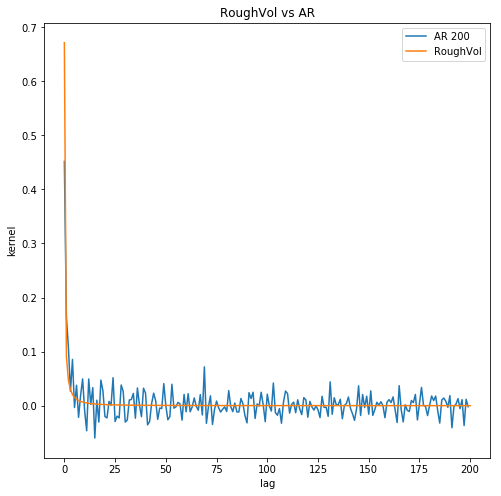

In [11]:
plt.figure(figsize=(8,8))
plt.plot(armodel.params(show_intercept=False))
plt.plot(roughmodel.kernal())
plt.legend([f'{armodel}',f'{roughmodel}'])
plt.xlabel('lag')
plt.ylabel('kernel')
plt.title('RoughVol vs AR')

Text(0.5,1,'RoughVol vs AR')

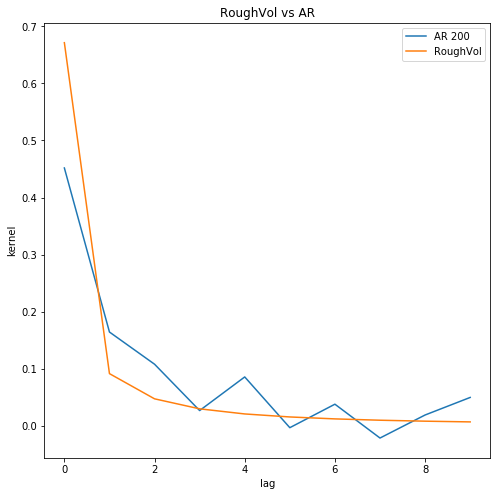

In [12]:
plt.figure(figsize=(8,8))
plt.plot(armodel.params(show_intercept=False)[:10])
plt.plot(roughmodel.kernal()[:10])
plt.legend([f'{armodel}',f'{roughmodel}'])
plt.xlabel('lag')
plt.ylabel('kernel')
plt.title('RoughVol vs AR')